In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
data = pd.read_csv("student-mat.csv")

In [12]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [13]:
data1 = data.drop(["Dalc","G1","G3"],axis=1)

In [14]:
data1dummy = pd.get_dummies(data1,drop_first=True)

In [15]:
x=data1dummy.drop("Walc",axis=1)
y=data1dummy["Walc"]

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
lm = LinearRegression()

In [21]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
predictions = lm.predict(x_test)

In [24]:
cdf = pd.DataFrame(lm.coef_,x.columns, columns=["Coeff"])

In [27]:
cdf=cdf.T

In [28]:
cdf

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
Coeff,0.032026,-0.113725,0.07431,0.113715,-0.258262,0.173761,-0.110965,-0.024477,0.493492,0.024595,...,-0.262506,-0.610589,0.001489,-0.162308,0.383289,-0.145314,-0.191006,0.35341,-0.146487,0.138861


In [29]:
from sklearn import metrics

In [30]:
metrics.mean_absolute_error(y_test,predictions)

0.9179816220475325

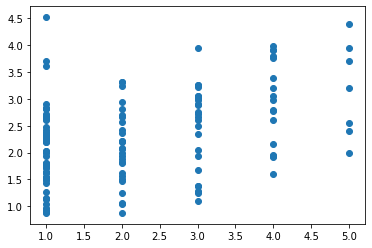

In [34]:
plt.scatter(y_test,predictions)

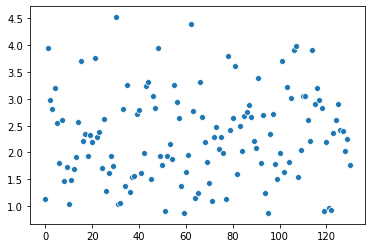

In [39]:
sns.scatterplot(data=predictions)

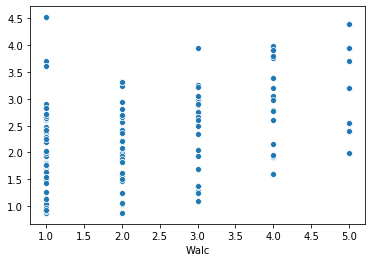

In [41]:
sns.scatterplot(y_test, predictions)

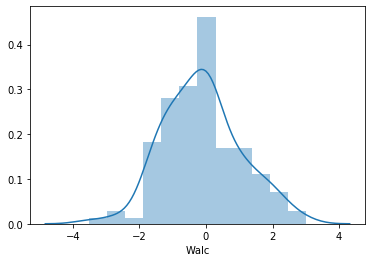

In [42]:
sns.distplot(y_test-predictions)